# Methylation-based Classification and Prognosis of AML: Methods

```{contents}
```

## Data sources

| Dataset 	| Disease 	| Data Source Link 	| Download Sample Size 	| Population 	| Platform 	|
|---	|---	|---	|---	|---	|---	|
| COG_AAML1031 	| AML 	| [GSE190931](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE190931) 	| 1048 	| Pediatric 	| EPIC 	|
| COG_AAML0531 	| AML 	| [GSE124413](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE124413) 	| 500 	| Pediatric 	| EPIC 	|
| Japanese AML-05 	| AML 	| [GSE133986](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE133986) 	| 64 	| Pediatric 	| EPIC 	|
| AML_TARGET-450k 	| AML 	| [GDC_TARGET-AML](https://portal.gdc.cancer.gov/repository?facetTab=cases&filters=%7B%22op%22%3A%22and%22%2C%22content%22%3A%5B%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22cases.project.program.name%22%2C%22value%22%3A%5B%22TARGET%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22cases.project.project_id%22%2C%22value%22%3A%5B%22TARGET-AML%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22files.data_format%22%2C%22value%22%3A%5B%22txt%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22files.platform%22%2C%22value%22%3A%5B%22illumina%20human%20methylation%20450%22%2C%22illumina%20methylation%20epic%22%5D%7D%7D%5D%7D) 	| 317 	| Pediatric 	| 450k 	|
| AML_TCGA 	| AML 	| [GDC_TCGA-AML](https://portal.gdc.cancer.gov/repository?facetTab=cases&filters=%7B%22op%22%3A%22and%22%2C%22content%22%3A%5B%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22cases.project.program.name%22%2C%22value%22%3A%5B%22TCGA%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22cases.project.project_id%22%2C%22value%22%3A%5B%22TCGA-LAML%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22files.data_format%22%2C%22value%22%3A%5B%22txt%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22files.platform%22%2C%22value%22%3A%5B%22illumina%20human%20methylation%20450%22%2C%22illumina%20methylation%20epic%22%5D%7D%7D%5D%7D) 	| 194 	| Adult 	| 450k 	|
| BeatAML 	| AML 	| [GSE159907](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE159907) 	| 316 	| Adult 	| EPIC 	|
| MDS_tAML 	| tAML, MDS 	| [GSE152710](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE152710) 	| 166 	| Adult 	| 450k 	|
| Nordic_ALL 	| ALL 	| [GSE49031](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi) 	| 945 	| Pediatric 	| 450k 	|
| ALL_TARGET 	| ALL 	| [GDC-TARGET-ALL](https://portal.gdc.cancer.gov/repository?facetTab=files&filters=%7B%22op%22%3A%22and%22%2C%22content%22%3A%5B%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22cases.project.program.name%22%2C%22value%22%3A%5B%22TARGET%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22cases.project.project_id%22%2C%22value%22%3A%5B%22TARGET-ALL-P3%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22files.data_format%22%2C%22value%22%3A%5B%22txt%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22files.platform%22%2C%22value%22%3A%5B%22illumina%20human%20methylation%20450%22%2C%22illumina%20methylation%20epic%22%5D%7D%7D%5D%7D&searchTableTab=cases) 	| 102 	| Pediatric 	| EPIC 	|
| Tcell_ALL_GRAAL 	| ALL 	| [GSE147667](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE147667) 	| 155 	| Both 	| EPIC 	|

These publicly available datasets were selected from GEO and GDC in 2023 based on the following criteria:

1. It must stem from a high-quality clinical trial or a large cohort study. 
2. It must contain clearly-labeled diagnostic leukemia samples from bone marrow or peripheral blood.
3. It must be available as raw methylation data (_.idat_ files) from methylation arrays (450k or EPIC).

## Step 1. Process raw data to get methylation beta values

This step will use SeSAMe ([Zhou et al. , 2018](https://pubmed.ncbi.nlm.nih.gov/30085201/)) to take signal intensity data (red and green .idat files) and convert them to beta values, which represent the % of methylation for each CpG site.

1. See processing options:

    ```bash
    python -m methylprep -v process 
    ```

2. Process dataset:

    ```bash
    python -m methylprep -v process -d <directory> --all --batch_size 199
    ```

```{note}
From this point on we will move from using `python3.7` to using `python3.8`.
```

### Where the data at?

In [1]:
input_path_450k = '../Data/Raw_Data/Methyl_Array_450k/'
input_path_EPIC = '../Data/Raw_Data/Methyl_Array_EPIC/'

output_path = '../Data/Intermediate_Files/'

### Load and Merge Dataframes

In [2]:
import methylcheck
import pandas as pd

input_paths = [
    (input_path_EPIC, 'GSE190931'),      # COG_AAML1031
    (input_path_EPIC, 'GSE124413'),      # COG_AAML0531_03P1
    (input_path_EPIC, 'GSE133986'),      # Japanese AML-05
    (input_path_450k, 'GDC_TARGET-AML'), # AML_TARGET-450k
    (input_path_450k, 'GDC_TCGA-AML'),   # AML_TCGA
    (input_path_EPIC, 'GSE159907'),      # BeatAML
    (input_path_450k, 'GSE152710'),      # MDS_tAML
    (input_path_450k, 'GSE49031'),       # Nordic_ALL
    (input_path_EPIC, 'GDC_TARGET-ALL'), # ALL_TARGET
    (input_path_EPIC, 'GSE147667')       # Tcell_ALL_GRAAL
]

# Load the dataframes from the input paths
df = [methylcheck.load(path + name, silent=True) for path, name in input_paths]

# Concatenate the dataframes in the df list
df = pd.concat(df, keys= [name for _, name in input_paths] , axis=1, join='inner')

print(f' Dataset (df) contains {df.shape[0]} rows (5mC sites/probes) and {df.shape[1]} columns (samples).')

 Dataset (df) contains 452453 rows (5mC sites/probes) and 3845 columns (samples).


## Step 2. Remove Suboptimal Probes

There are several critera for exclusion of probes: Areas that have polymorphisms, cross-hybridization, repeat sequence elements, or base color changes can affect probe quality. Below are publications that have benchmarked probe quality and have provided lists of probes to exclude:

- [Chen et al., 2013](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3592906/)
- [Price et al., 2013](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3740789/)
- [Naeem et al., 2014](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3943510/)
- [DacaRoszak et al., 2015](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4659175/)
- [Zhou et al., 2016](https://academic.oup.com/nar/article/45/4/e22/2290930)

This function removes proves listed as sub-optimal according to [Zhou et al., 2016](https://academic.oup.com/nar/article/45/4/e22/2290930). For the .tsv file containing the annotated probes, download the paper's supplementary material. See figure 5 of their paper for detailed description.

In [3]:
def exclude_suboptimal_probes(df):
    '''This function removes proves listed as sub-optimal according to:
    
    Zhou, W., Laird, P. W. & Shen, H.. Comprehensive characterization,
    annotation and innovative use of Infinium DNA methylation BeadChip probes.
    Nucleic Acids Research gkw967 (2016).
    doi:10.1093/nar/gkw967

    For the .tsv file containing the annotated probes, download the paper's
    supplementary material.
    '''
    # Load the list of suboptimal probes
    zhou2016_probes = pd.read_csv('../Data/UnreliableProbesList_Zhou2016/EPIC.anno.GRCh38.tsv', sep='\t',index_col=0)

    # Select the probes that are listed as suboptimal
    unreliable_probes = list(zhou2016_probes[zhou2016_probes['MASK.general'] == True].index)

    # Remove the unreliable probes from the dataframe
    df_ = df[~df.index.isin(unreliable_probes)]
    
    print(
        f'Removed {df.shape[0]-df_.shape[0]} suboptimal probes. {df_.shape[0]} probes remaining.')

    return(df_)

df = exclude_suboptimal_probes(df)

Removed 47382 suboptimal probes. 405071 probes remaining.


## Step 3. Remove sex-linked probes

In [4]:
df = methylcheck.exclude_sex_control_probes(df, '450k', no_sex=True, no_control=False, verbose=True)

450k: Removed 9570 sex-linked probes from 3845 samples. 395501 probes remaining.


### Evaluate Missing Values

<Axes: >

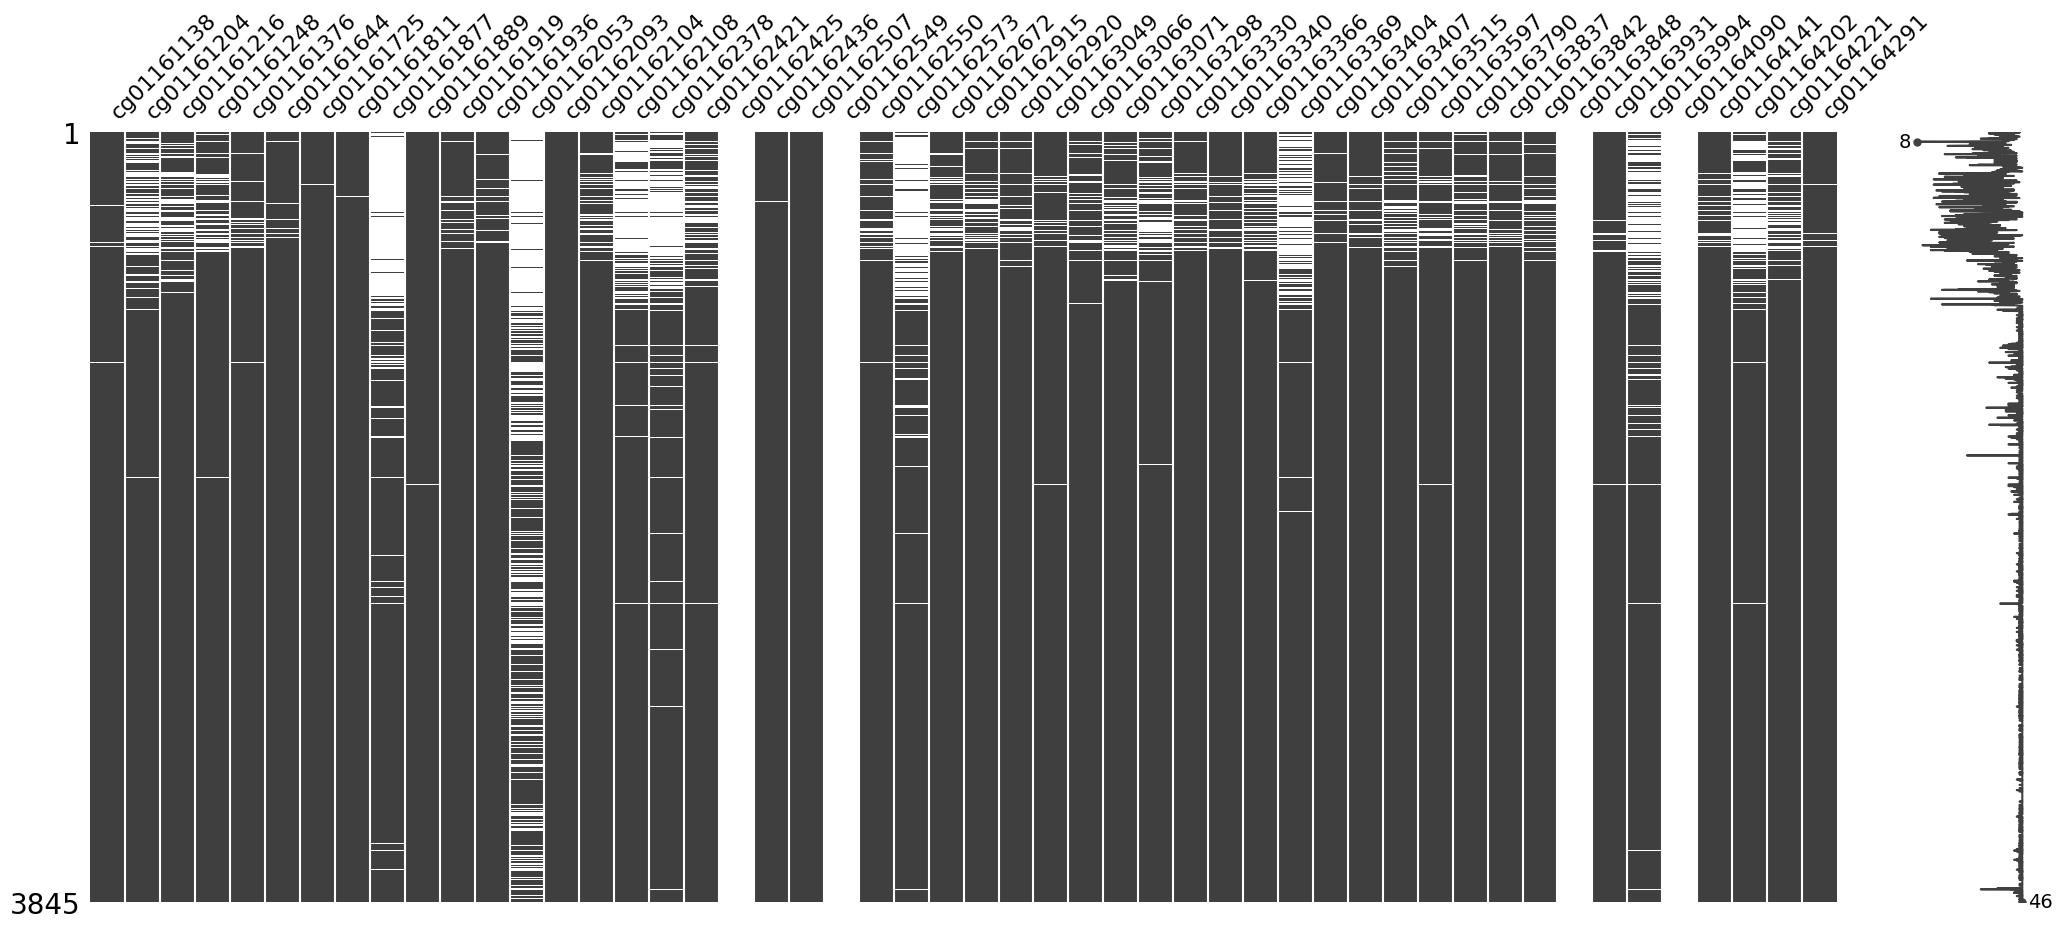

In [5]:
import missingno as msno

# Plot the missing values
msno.matrix(df.iloc[20000:20050,:].T.reset_index(drop=True))

## Step 4. Remove cell line samples

In [6]:
GSE49031_colon_cancer_cell_line_samples =  [('GSE49031', '5723662002_R06C02'),
                                            ('GSE49031', '5723662025_R06C02'),
                                            ('GSE49031', '5854945004_R04C01'),
                                            ('GSE49031', '5854945004_R06C02'),
                                            ('GSE49031', '5859501021_R04C01'),
                                            ('GSE49031', '5859501021_R06C02'),
                                            ('GSE49031', '5975819012_R05C02'),
                                            ('GSE49031', '5975819012_R06C02'),
                                            ('GSE49031', '6005574026_R05C02'),
                                            ('GSE49031', '6005574026_R06C02'),
                                            ('GSE49031', '6929726092_R06C02')]

df = df.drop(GSE49031_colon_cancer_cell_line_samples, axis=1)

print(
    f'{len(GSE49031_colon_cancer_cell_line_samples)} colon cancer cell line samples removed. {df.shape[1]} samples remaining.')

11 colon cancer cell line samples removed. 3834 samples remaining.


## Step 5. Exclude samples in which >20% of probes have failed p-values

A strict metric implemented by Illumina quality control process is `FAIL by pval`, which happens if, for a given sample, the detection p-value is >0.05 in >20% of probes.

Recall that detection p-values measure how likely it is that signals are background fluorescence. There are a few methods for calculating these:  ```SeSAMe``` and ```methylprep``` implement pOOBAH, which stands for P-value Out Of Band (OOB) probes for Array Hybridization. For more, see SeSAMe's paper in [Zhou et al. , 2018](https://pubmed.ncbi.nlm.nih.gov/30085201/).

In other words, we will exclude samples that Illumina QC categorizes as FAIL(pval) for meeting the condition: (pOOBAH > 0.05) >20% probes. Here, failed probes are listed as `NaN`, so we will count the number of `NaN` values in each sample and exclude samples that have more than 20% `NaN` values.

In [7]:
def exclude_failed_samples(df2):
    '''This function removes samples that have more than 20% NaN values.'''

    # Calculate the number of NaN values in each sample
    nan_count = df2.isna().sum()

    # Calculate the total number of probes (rows) in the DataFrame
    total_probes = df2.shape[0]

    # Calculate the percentage of NaN values for each sample
    nan_percentage = (nan_count / total_probes) * 100

    # Identify samples that meet the condition of having more than 20% NaN values
    samples_to_exclude = nan_percentage[nan_percentage > 20].index

    # Exclude samples that meet the condition from the DataFrame
    filtered_df2 = df2.drop(samples_to_exclude, axis=1)
    
    # Print the number of samples before and after filtering
    print(
    f"Removed {df2.shape[1]-filtered_df2.shape[1]} samples ({round((df2.shape[1]-filtered_df2.shape[1])/df2.shape[1]*100,2)}%). {filtered_df2.shape[1]} samples remaining."
    )
    
    return filtered_df2

df = exclude_failed_samples(df)


Removed 466 samples (12.15%). 3368 samples remaining.


## Step 6. Exclude CpG probes that are missing in >5% of samples

In [8]:
def probe_cutoff(qc_betas, threshold):
    qc_betas2 = qc_betas.dropna(axis=0, thresh = int(threshold*qc_betas.shape[1]))
    print(f'{qc_betas.shape[0] - qc_betas2.shape[0]} probes removed. {qc_betas2.shape[0]} probes remaining.')

    return(qc_betas2)

df = probe_cutoff(df, threshold=0.95)

62253 probes removed. 333248 probes remaining.


### Evaluate Missing Values

<Axes: >

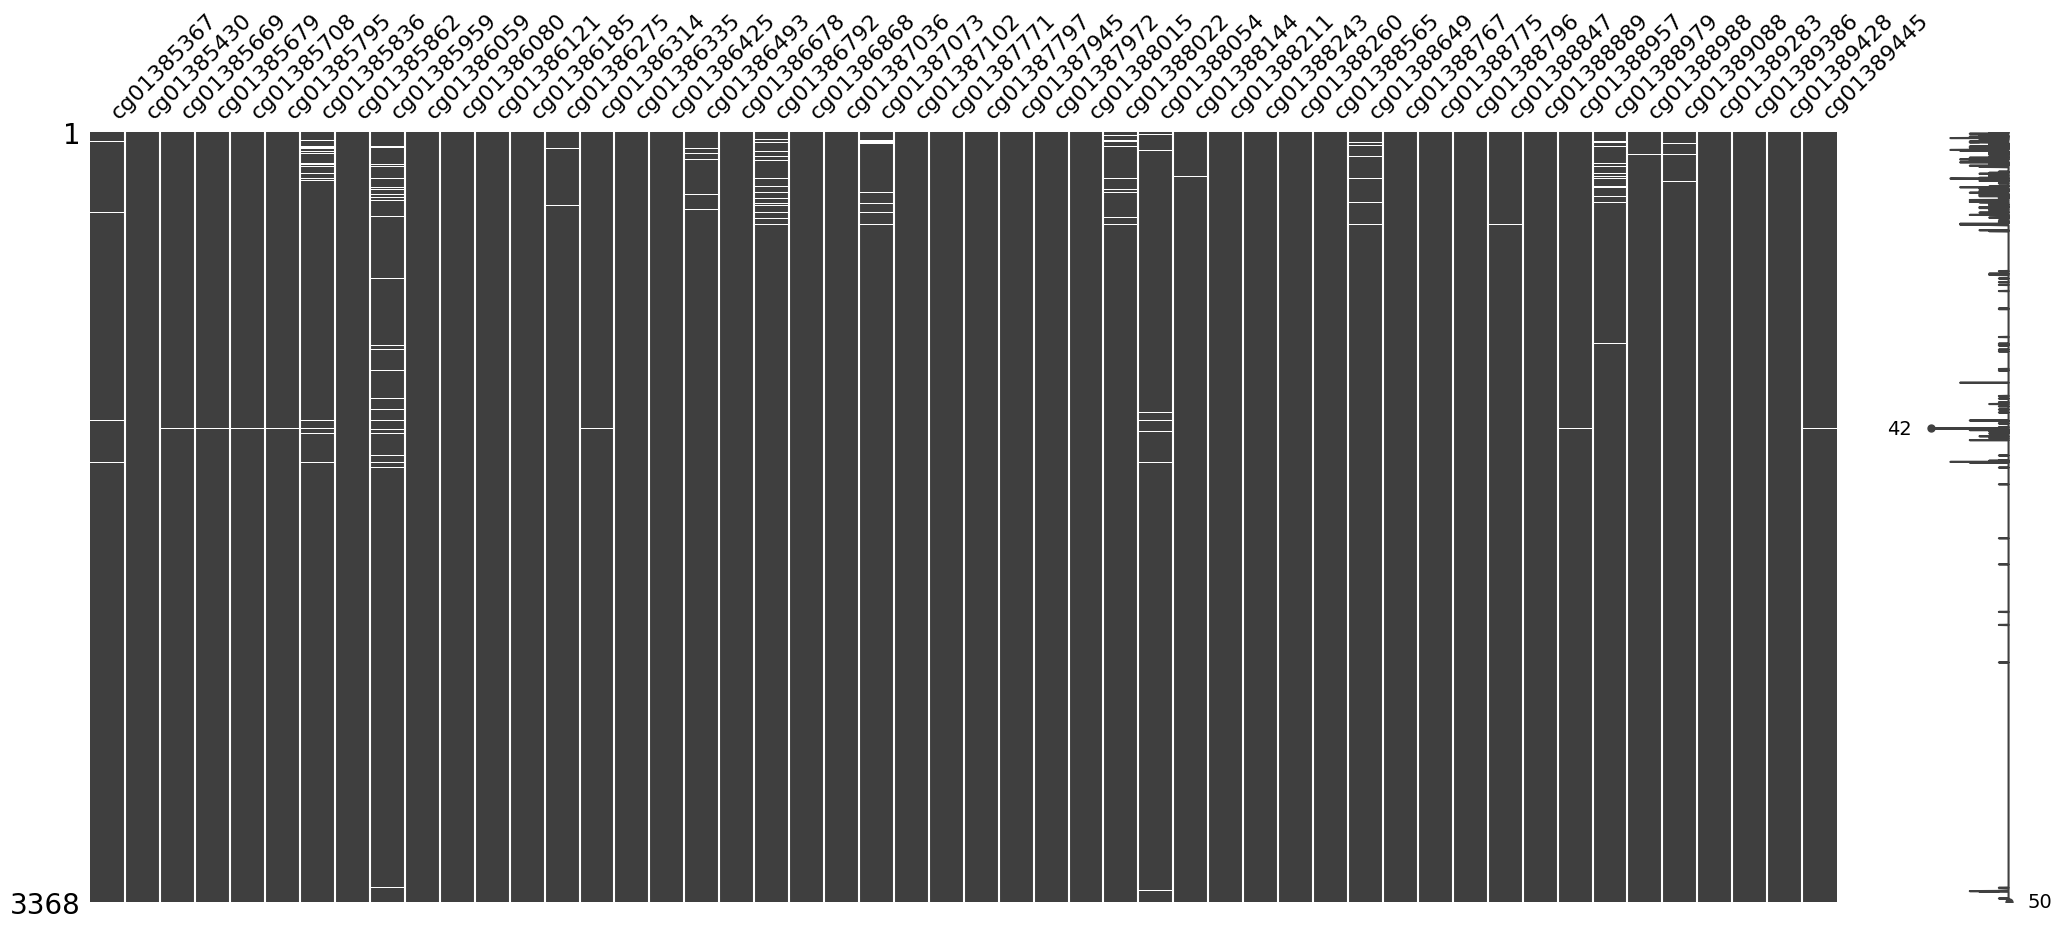

In [9]:
# Plot the missing values
msno.matrix(df.iloc[20000:20050,:].T.reset_index(drop=True))

## Step 7. Impute remaining missing values

- __Method__: Mean by batch (it replaces each missing value by averaging all the known values for that CpG across samples within their batch).

- __It turns out simple mean works well in methylation β-values__:

    _In conclusion, the consolidated and manufacturer encouraged practice to use β-value seems appropriate for DNA methylation data imputation. The choice of the best imputation method is somewhat more subtle and depends essentially on the available computational resources and the amount of missing values. Independently of the expected missingness mechanisms, regression-based methods provide on average more accurate estimates of the missing values. However, imputations with regression methods in the presence of limited computational resources can be a rather challenging task. In such cases, the simple mean approach can surprisingly be a better choice than more sophisticated methods_ ([Lena et al., 2020](https://pubmed.ncbi.nlm.nih.gov/32600298/)).

- __This step inevitably introduces bias__: More sophisticated methods, however, also do. Benchmarks done by the paper above and others reported that the increase in error across methods is roughly similar ([see here](https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html#sphx-glr-auto-examples-impute-plot-missing-values-py)), which places `imputation by mean` as an equivalently error-prone method compared to others but vastly simpler and faster.

In [10]:
import pandas as pd

def impute_with_mean_of_batch(df):
    '''This function imputes missing values with the mean of the batch the sample belongs to.'''

    # Separate samples based on first level of the multi-index and fill NaNs with mean
    df_dict = {key: df[key].fillna(df[key].mean(axis=0)).round(3) for key in df.columns.levels[0]}
    
    # Merge the dataframes in multi-index format
    df2 = pd.concat(df_dict, axis=1, join='inner')
    
    print('NaN values filled by the mean probe value of the batch.')
    
    return df2

# Impute missing values
df = impute_with_mean_of_batch(df)


NaN values filled by the mean probe value of the batch.


### Evaluate Missing Values

<Axes: >

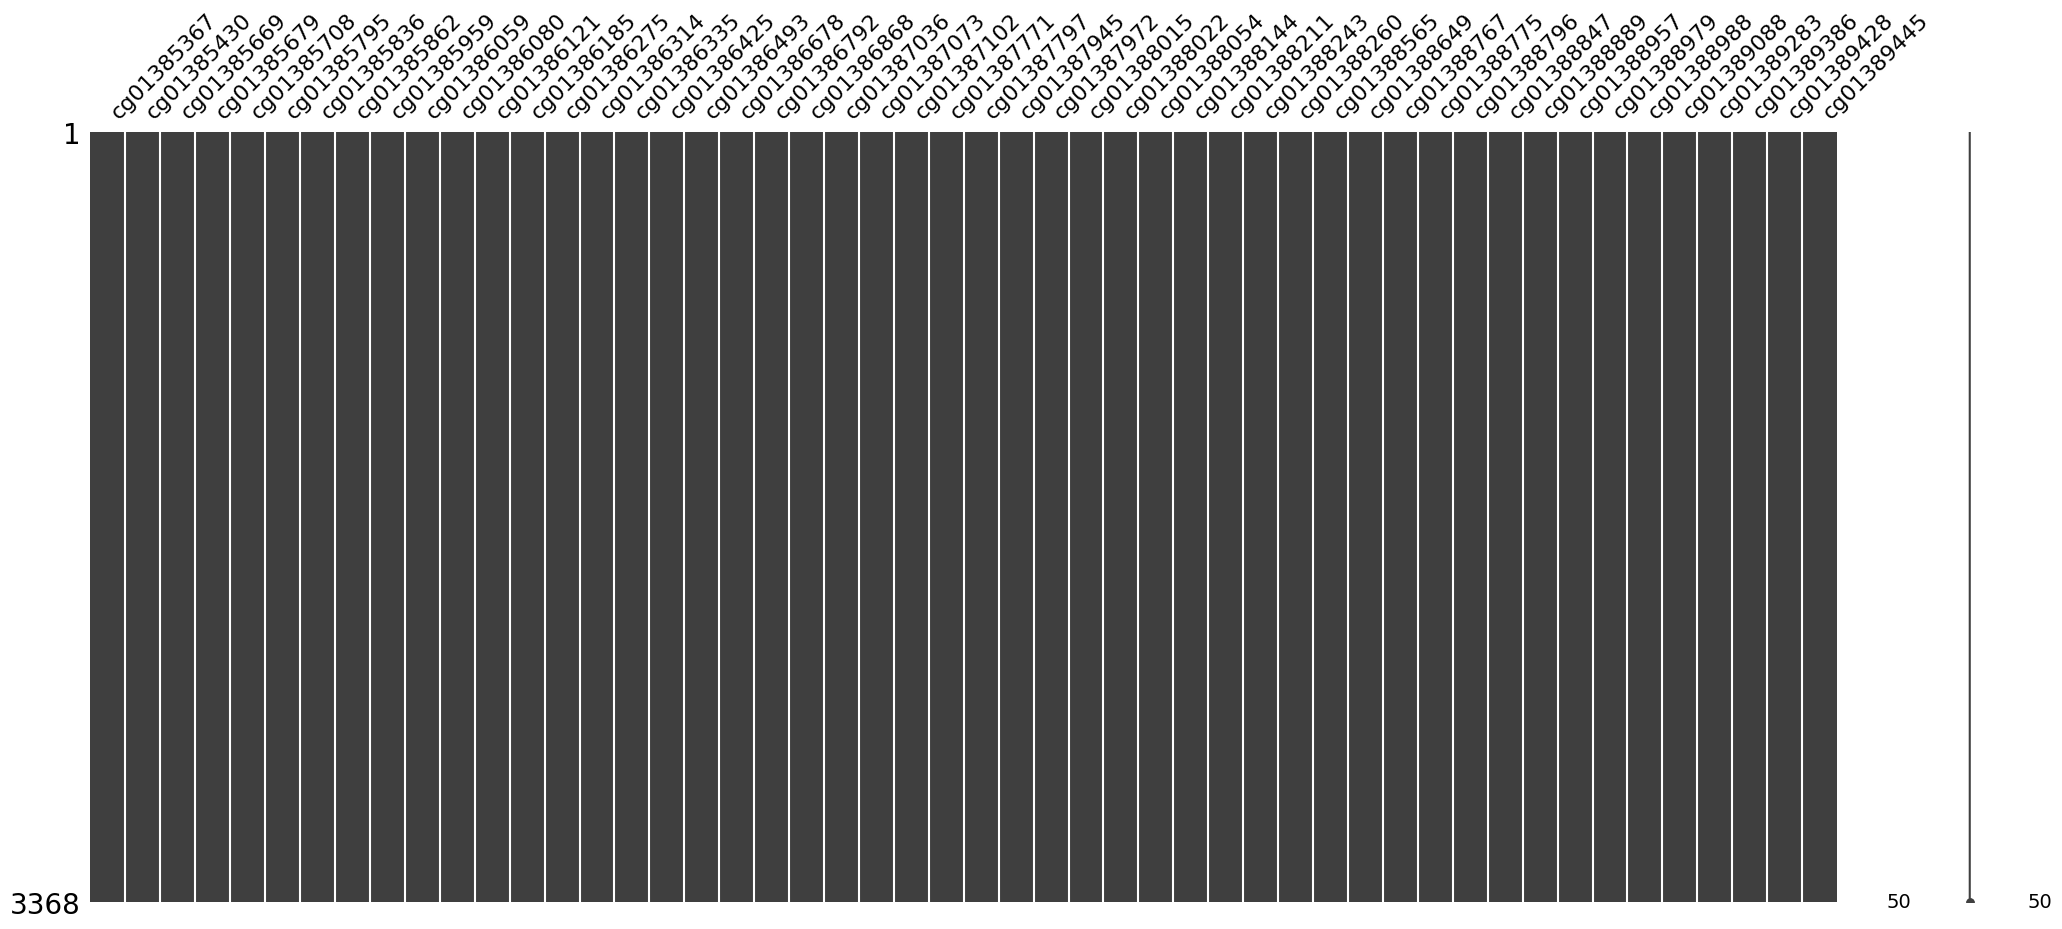

In [11]:
# Plot the missing values
msno.matrix(df.iloc[20000:20050,:].T.reset_index(drop=True))

## Step 8. Perform batch correction

- __pyCombat__: a Python tool for batch effects correction in high-throughput molecular data using empirical Bayes methods

- __Github__: [https://epigenelabs.github.io/pyComBat/](https://epigenelabs.github.io/pyComBat/)

- __Implementation Preprint__: [bioRxiv](https://doi.org/10.1101/2020.03.17.995431)

- __Original Paper__: [Adjusting batch effects in microarray expression data using empirical Bayes methods](https://pubmed.ncbi.nlm.nih.gov/16632515/)

In [12]:
from combat.pycombat import pycombat

# Correct batch effects in the training dataset
df = pycombat(data = df, batch = df.columns.droplevel(1)).round(3)

print('Succesfully corrected batch effects in the training dataset.')


Found 10 batches.
Adjusting for 0 covariate(s) or covariate level(s).


Standardizing Data across genes.


## Step 9. Remove outliers by PCA

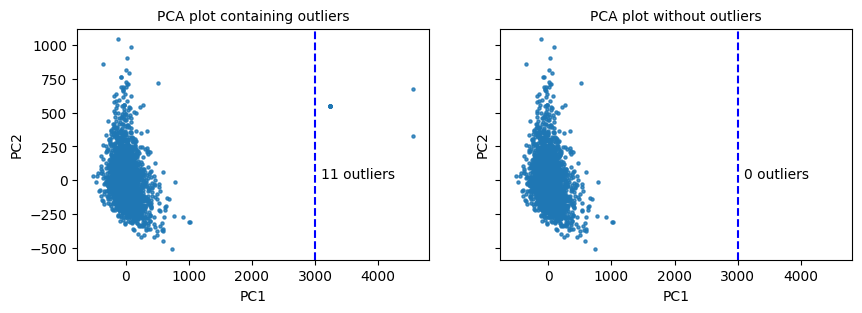

Removed 11 outliers. 3357 samples remaining.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def remove_outliers(df, threshold=3000):
    '''This function removes outliers from a DataFrame using PCA.'''

    # Standardize the data
    X_std = StandardScaler().fit_transform(df.T)

    # Perform PCA
    pca = PCA(n_components=2, random_state=42)
    principal_components = pca.fit_transform(X_std)

    # Create a DataFrame with the PCA data
    principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=df.columns)

    # Select non-outlier samples
    non_outliers = principal_df[principal_df['PC1'] < threshold]
    outliers = principal_df[principal_df['PC1'] >= threshold].index

    # Remove outliers from the input DataFrame
    df_filtered = df.drop(outliers, axis=1)

    # Plot PCA data
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharex=True, sharey=True)
    ax1.scatter(principal_df['PC1'], principal_df['PC2'], s=5, alpha=0.8)
    ax1.set_title('PCA plot containing outliers', fontsize=10)
    ax2.scatter(non_outliers['PC1'], non_outliers['PC2'], s=5, alpha=0.8)
    ax2.set_title('PCA plot without outliers', fontsize=10)

    # Add a vertical line to indicate the threshold and count number of samples to the right and left of the line
    ax1.axvline(x=threshold, color='b', linestyle='--')
    ax2.axvline(x=threshold, color='b', linestyle='--')
    ax1.text(threshold+100, 10, f'{principal_df[principal_df["PC1"] >= threshold].shape[0]} outliers', fontsize=10)
    ax2.text(threshold+100, 10, '0 outliers', fontsize=10)


    for ax in (ax1, ax2):
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')

    plt.show()

    print(f'Removed {df.shape[1]-df_filtered.shape[1]} outliers. {df_filtered.shape[1]} samples remaining.')
    return df_filtered

# Remove outliers
df = remove_outliers(df)


## Step 10. Remove samples based on clinical exclusion criteria

This section will be completed soon (I need to add the code for merging and indexing clinical data from BeatAML and TCGA LAML).

## Save Dataset

In [ ]:
df = df.T.reset_index(level=0, names='Batch')

print(
    f'Dataset (df) contains {df.shape[1]} rows (5mC sites/probes) and {df.shape[0]} columns (samples).')
df.to_pickle(output_path + '2_MethylData_Processing_Output.pkl')

print(
    f'Successfuly saved processed methyl dataset.\nPath: {output_path}')


 Dataset (df) contains 333249 rows (mC sites) and 3357 columns (samples).
Successfuly saved processed methyl dataset.
Path: ../Data/Intermediate_Files/


## Appendix 1. How to download data from GEO or GDC

### Gene Expression Omnibus (GEO)

1. Install Python3.7

    - Go to [python.org](https://www.python.org/downloads/release/python-379/) and download python according to your operating system
    - During install, click on the box to enable it on PATH

2. Open a terminal (Windows: git bash, Linux/Mac: terminal)

    - Write the following commands to install methylprep:

    ```bash
    pip install --upgrade pip
    pip install methylprep==1.7.1
    ```

3. Download dataset of interest directly from GEO:

    ```bash
    python -m methylprep beta_bake -z -i <GEO series ID> -d <directory> 
    ```

```{note}
`methylprep` works best on Linux/Mac. API can be found [here](https://www.life-epigenetics-methylprep.readthedocs-hosted.com/en/latest/docs/cli.html).
```

### Genomic Data Commons (GDC)


1. Go to [GDC Repository](https://www.portal.gdc.cancer.gov/repository).
2. Select the right filtering criteria for you (or click on one of the links from the table above).
3. Once you have a selection of your samples, download the _Manisfest_ file by clicking on the _Manifest_ button.
4. Under the _Cases_ tab, you may find a button with the name _Clinical_ that will download a .tsv file with the clinical data for the samples you selected.
5. To download the data, you will need the GDC Data Transfer Tool (command-line) that you can find [here](https://www.gdc.cancer.gov/access-data/gdc-data-transfer-tool).
6. Follow the instructions on the link about how to download the file and use it.
7. As an example, on Windows, download the file and extract it to your data folder, then run:
    ```
    .\gdc-client download -m <path to the manisfest file you downloaded>.txt --no-related-files --no-annotations --latest
    ```
8. When the .idat files are downloaded, move them to Linux file system (to be used with WSL). If working on a Mac or native Linux, ignore this step.
9. Save the sample sheet file as _samplesheet.csv_ in the directory where the data are located. You can do that through terminal: 
    ```
    tar -xzf <tar file name>
    sed 's/\t/,/g' clinical.tsv > samplesheet.csv
    ```
    Or you can open `clinical.tsv` in Excel and save it as `samplesheet.csv`.

    Note: for the samplesheet file to be recognized, it has to be name exactly _samplesheet.csv_. If that does not work, change the 'open with' to Excel and/or add '.csv' to the end of the file name.
    
10. Extract idat files from folders and remove .parcel files and empty folders:
    ```
    find . -mindepth 2 -type f -exec mv -t . -i '{}' +;
    find . -type f -name "*.parcel" -exec rm -f {} \;
    find . -mindepth 1 -type d -exec rm -rf {} \;
    ```
10. Congrats! You are ready to process the files using ```methylprep```.

## Watermark

In [1]:
%load_ext watermark

In [7]:
%watermark -v -p methylcheck,pandas -a Francisco_Marchi@Lamba_Lab_UF -d -m

Author: Francisco_Marchi@Lamba_Lab_UF

Python implementation: CPython
Python version       : 3.8.16
IPython version      : 8.12.2

methylcheck: 0.8.5
pandas     : 2.0.1

Compiler    : GCC 11.3.0
OS          : Linux
Release     : 5.15.90.1-microsoft-standard-WSL2
Machine     : x86_64
Processor   : x86_64
CPU cores   : 20
Architecture: 64bit

